### Author : Neeraj Thosar
### TSF task 3

## Processing of data

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

with open("/content/gdrive/MyDrive/TSF tasks/datasets/SampleSuperstore.csv","r+") as file:
    df = pd.read_csv(file)

df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


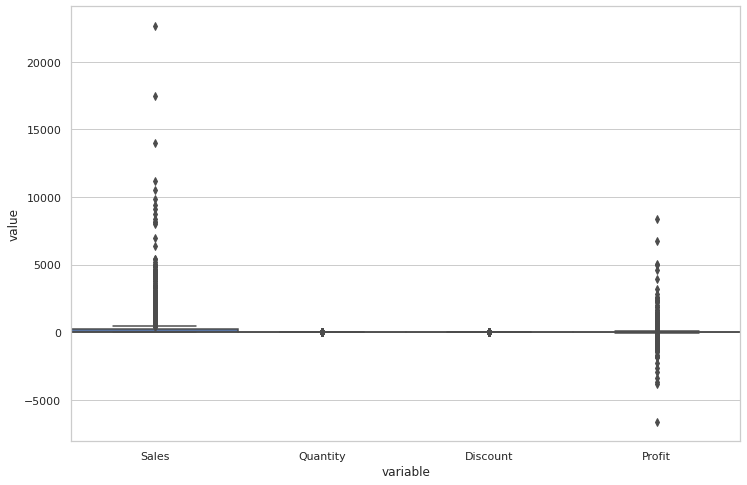

In [ ]:
import seaborn as sns
import numpy as np
df = df.drop(['Country', 'Postal Code'], axis =1)
df_num = df.select_dtypes(include = [np.number])
plt.figure(figsize = [12, 8])
sns.set(style = 'whitegrid')
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(df_num), width = 1)
plt.show()

#### From the above plot, the outliers in Sale and Profit are clearly visible. As it is a large dataset, we can remove those rows containing outliers in order to improve our results.



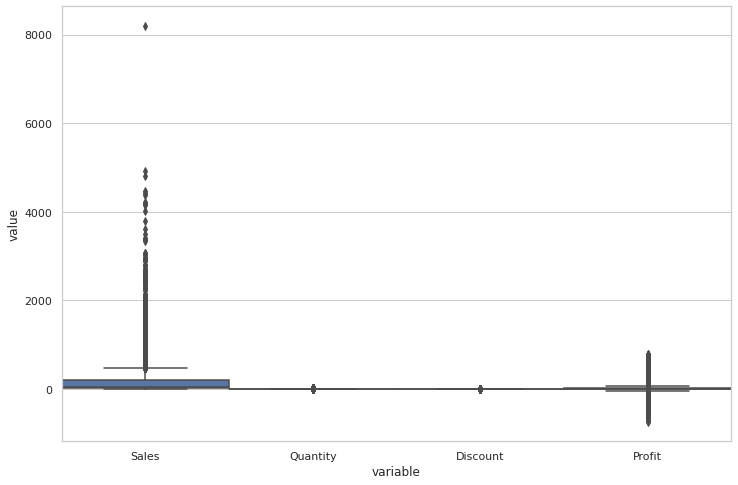

In [ ]:
def remove_outlier(dataset, k= 3.33):
    for col in dataset.columns:
        if (dataset[col].dtype == 'int64' or dataset[col].dtype == 'float64'):
            mean = dataset[col].mean()
            global ds
            std = dataset[col].std()
            outlier = [i for i in dataset[col] if (i > mean - k * std)]
            outlier = [i for i in outlier if (i < mean + k * std)]
            ds = dataset.loc[dataset[col].isin(outlier)]

remove_outlier(df, k = 3.33)
ds_num = ds.select_dtypes(include = [np.number])
plt.figure(figsize = [12, 8])
sns.set(style = 'whitegrid')
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(ds_num), width = 1)
plt.show()

#### From the above BoxPlot, it is visible that most of the outliers are removed and thus we will use this dataset for EDA.

## Exploratory Data analysis 

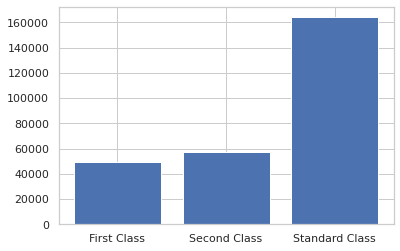

In [ ]:
profitsofclasses=[]
for i in ["First Class", "Second Class",  "Standard Class"]:
  profitsofclasses.append(sum(df[df["Ship Mode"] == i]["Profit"]))

plt.bar(["First Class", "Second Class",  "Standard Class"], profitsofclasses)
plt.show()

### This shows that highest profits of the company is from the Standard Class shipment.

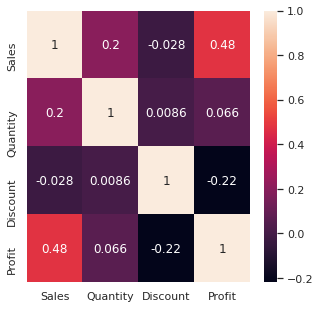

In [ ]:
df1 = df.drop(columns = ["Ship Mode" ,"City", "State","Region", "Category","Sub-Category"])
import seaborn as sns
import matplotlib.pyplot as plt
corr = df1.corr()
fig,ax = plt.subplots(figsize = (5,5))
sns.heatmap(corr, annot = True, ax=ax)

#### This Matrix shows that there is no Correlation between any variables i.e., We can infer that profits and sales don't increase with increase in discount.

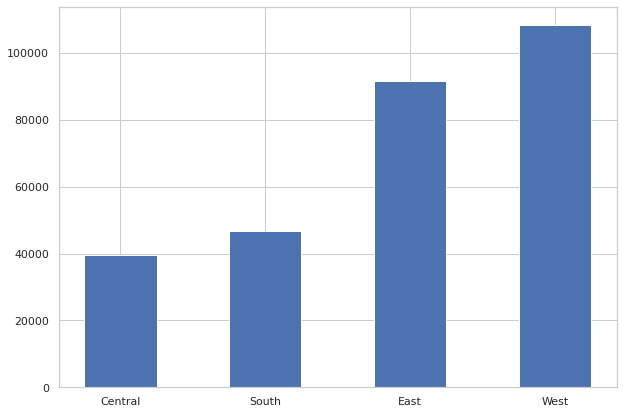

In [ ]:
profitsofregions = []
for i in list(df.Region.unique()):
  profitsofregions.append((i , sum(df[df["Region"] == i]["Profit"])))

profitsofregions.sort( key = lambda x: x[1])
x=[]
y=[]
for i in profitsofregions[:11]:
  x.append(i[0])
  y.append(i[1])
plt.figure(figsize = (10,7))
plt.bar(x,y, width= 0.5)
plt.show()

#### The East and West region has satisfactory profits. The Central and South region has the lowest profits. And therefore Central and South region needs somw work to be done to increase the profits. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Serie

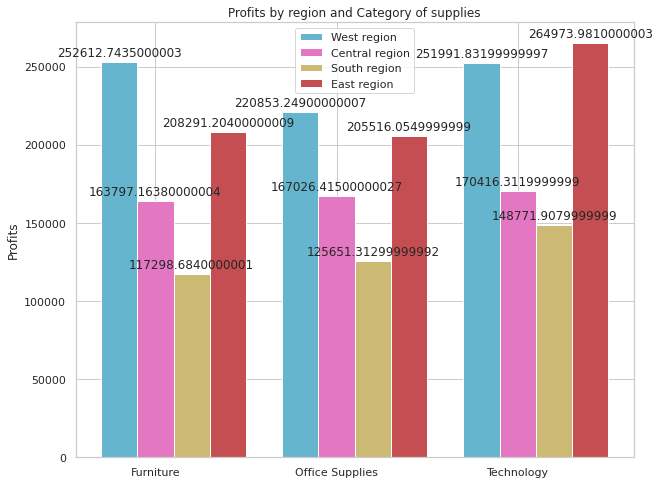

In [ ]:
#df.Category.unique()
fur = sum(df[df["Region"] == "West"][df["Category"] == "Furniture"]["Sales"])
off = sum(df[df["Region"] == "West"][df["Category"] == "Office Supplies"]["Sales"])
tech = sum(df[df["Region"] == "West"][df["Category"] == "Technology"]["Sales"])
labels=["Furniture", "Office Supplies", "Technology"]
x = np.arange(len(labels))
y1=[fur, off, tech]

fur = sum(df[df["Region"] == "Central"][df["Category"] == "Furniture"]["Sales"])
off = sum(df[df["Region"] == "Central"][df["Category"] == "Office Supplies"]["Sales"])
tech = sum(df[df["Region"] == "Central"][df["Category"] == "Technology"]["Sales"])
y2=[fur, off, tech]

fur = sum(df[df["Region"] == "South"][df["Category"] == "Furniture"]["Sales"])
off = sum(df[df["Region"] == "South"][df["Category"] == "Office Supplies"]["Sales"])
tech = sum(df[df["Region"] == "South"][df["Category"] == "Technology"]["Sales"])
y3=[fur, off, tech]
fur = sum(df[df["Region"] == "East"][df["Category"] == "Furniture"]["Sales"])
off = sum(df[df["Region"] == "East"][df["Category"] == "Office Supplies"]["Sales"])
tech = sum(df[df["Region"] == "East"][df["Category"] == "Technology"]["Sales"])
y4=[fur, off, tech]

plt.figure(figsize=(10, 8))
ax = plt.subplot(111)

bar1 = ax.bar(x- 0.2, y1, width=0.2, color='c', align='center', label = "West region")
bar2 = ax.bar(x, y2, width=0.2, color='tab:pink', align='center', label = "Central region")
bar3 = ax.bar(x+ 0.2, y3, width=0.2, color='y', align='center', label = "South region")
bar4 = ax.bar(x+ 0.4, y4, width=0.2, color='r', align='center', label = "East region")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Profits')
ax.set_title('Profits by region and Category of supplies')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
autolabel(bar4)
fig.tight_layout()

plt.show()
plt.show()

#### In each region office supplies has less supplies as compared to others.

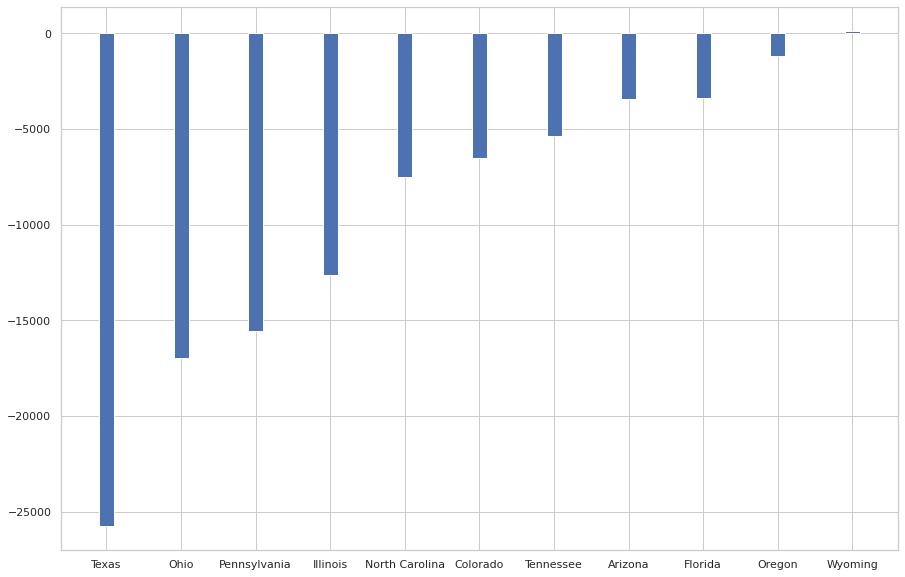

In [ ]:
states= list(df.State.unique())
profitsofstates = []
for i in states:
  profitsofstates.append((i , sum(df[df["State"] == i]["Profit"])))

profitsofstates.sort( key = lambda x: x[1])
x=[]
y=[]
for i in profitsofstates[:11]:
  x.append(i[0])
  y.append(i[1])
plt.figure(figsize = (15,10))
plt.bar(x,y,width=0.2)
plt.show()


#### the above graph is of the States of lowest profits in which improvement is needed.

In [ ]:
groups = ds.groupby('City')
total_profits = groups['Profit'].agg(np.sum).sort_values(ascending = False).reset_index()
total_profits.head()

,City,Profit
0,New York City,39957.8971
1,Los Angeles,26553.7452
2,Seattle,18951.2609
3,San Francisco,16562.3989
4,Detroit,8235.4208


#### These are the leading cities in terms of profits.

In [ ]:
total_discount = groups['Discount'].agg(np.sum).sort_values(ascending = False).reset_index()
total_discount.head()

,City,Discount
0,Philadelphia,173.70
1,Houston,139.94
2,Chicago,118.70
3,Dallas,55.50
4,Los Angeles,54.70


#### The above cities has the highest of discounts and yet their profits are not among the highest. Thus we can reduce the discounts in these cities.